In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import rel_entr
import seaborn as sns
import matplotlib.pyplot as plt
from pysabr import Hagan2002NormalSABR
from fwdsabr.find_fvol import find_fvol, SabrDist, find_sabr
from fwdsabr.option_pricing import compute_option_prices
from datafetchingirta import DataFetcher
from period import Period

Loaded
Loaded


In [2]:
ezbh = DataFetcher()

Getting Curves...
Getting Vols
Updating Pricing factory
Creating Risk Factory
Done


In [3]:
generator = 'USD SOFR'
exp = '1Y'
period_fvol = '1Y'
tail = '30Y'
exp_long = str(Period.from_string(exp) + Period.from_string(period_fvol))
with_mc = False
if with_mc:
    tail1 = f'{period_fvol}x{tail}'
else:
    tail1 = tail

sabr_p1 = find_sabr(
    ezbh=ezbh,
    generator=generator,
    exp=exp,
    tail=tail1,
    method='vols'
)
sabr_p2 = find_sabr(
    ezbh=ezbh,
    generator=generator,
    exp=exp_long,
    tail=tail,
    method='vols'

)
distribution_df = ezbh.distribution_df(Generator=generator, EffExp=exp_long, MtyTnr=tail,).dropna()
strikes_bps = np.array(distribution_df['strike_float'].values) 
strikes = strikes_bps / 10000
# strikes = np.arange(0, .1, 0.001)
(exp, tail1), (exp_long, tail)

Optimization result find_sabr_from_vols:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.3270381151805044
             x: [ 8.702e-03  6.348e-02  9.967e-01  4.165e-02  5.693e-01]
           nit: 506
          nfev: 794
 final_simplex: (array([[ 8.702e-03,  6.348e-02, ...,  4.165e-02,
                         5.693e-01],
                       [ 8.702e-03,  6.348e-02, ...,  4.174e-02,
                         5.693e-01],
                       ...,
                       [ 8.702e-03,  6.345e-02, ...,  4.164e-02,
                         5.694e-01],
                       [ 8.703e-03,  6.350e-02, ...,  4.170e-02,
                         5.693e-01]]), array([ 3.270e-01,  3.270e-01,  3.270e-01,  3.270e-01,
                        3.270e-01,  3.270e-01]))
Optimization result find_sabr_from_vols:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.8354827019243658
      

(('1Y', '30Y'), ('2Y', '30Y'))

In [4]:
optimization_result, sabr_p1_p2 = find_fvol(
    sabr_p1, 
    sabr_p2, 
    strikes=strikes
    )

Optimization terminated successfully.
         Current function value: -89942.662071
         Iterations: 234
         Function evaluations: 402
Optimization result:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -89942.66207141892
             x: [ 3.132e-03  4.017e-02 -1.000e+00  3.536e-02  1.000e+01]
           nit: 234
          nfev: 402
 final_simplex: (array([[ 3.132e-03,  4.017e-02, ...,  3.536e-02,
                         1.000e+01],
                       [ 3.132e-03,  4.017e-02, ...,  3.541e-02,
                         1.000e+01],
                       ...,
                       [ 3.131e-03,  4.017e-02, ...,  3.535e-02,
                         1.000e+01],
                       [ 3.133e-03,  4.017e-02, ...,  3.530e-02,
                         1.000e+01]]), array([-8.994e+04, -8.994e+04, -8.994e+04, -8.994e+04,
                       -8.994e+04, -8.994e+04]))


In [5]:
sabr_p1_p2

<Hagan2002NormalSABR: f=0.03994783031956201, shift=0.04017418663508629, t=0.9880952380952381, v_atm_n=0.003132405331327179, beta=-1.0, rho=0.035363296752793774, volvol=10.0>

In [6]:
sabr_p2

<Hagan2002NormalSABR: f=0.03994783031956201, shift=0.0725034837085391, t=1.9801587301587302, v_atm_n=0.008821555554001229, beta=0.0010023123873716638, rho=0.315131346772173, volvol=0.4278766817227675>

In [7]:
strikes

array([-5.21696804e-05,  9.47830320e-04,  1.94783032e-03,  2.94783032e-03,
        3.94783032e-03,  4.94783032e-03,  5.94783032e-03,  6.94783032e-03,
        7.94783032e-03,  8.94783032e-03,  9.94783032e-03,  1.09478303e-02,
        1.19478303e-02,  1.29478303e-02,  1.39478303e-02,  1.49478303e-02,
        1.59478303e-02,  1.69478303e-02,  1.79478303e-02,  1.89478303e-02,
        1.99478303e-02,  2.09478303e-02,  2.19478303e-02,  2.29478303e-02,
        2.39478303e-02,  2.49478303e-02,  2.59478303e-02,  2.69478303e-02,
        2.79478303e-02,  2.89478303e-02,  2.99478303e-02,  3.09478303e-02,
        3.19478303e-02,  3.29478303e-02,  3.39478303e-02,  3.49478303e-02,
        3.59478303e-02,  3.69478303e-02,  3.79478303e-02,  3.89478303e-02,
        3.99478303e-02,  4.09478303e-02,  4.19478303e-02,  4.29478303e-02,
        4.39478303e-02,  4.49478303e-02,  4.59478303e-02,  4.69478303e-02,
        4.79478303e-02,  4.89478303e-02,  4.99478303e-02,  5.09478303e-02,
        5.19478303e-02,  

In [8]:
sabr_dist_p1 = SabrDist.from_sabr(sabr=sabr_p1)
sabr_dist_p1_p2 = SabrDist.from_sabr(sabr_p1_p2)
sabr_dist_p2 = SabrDist.from_sabr(sabr_p2)

In [9]:
sabr_p1.normal_vol(strikes)

array([0.01190304, 0.01178931, 0.01167521, 0.01156077, 0.01144603,
       0.01133103, 0.01121582, 0.01110044, 0.01098497, 0.01086948,
       0.01075405, 0.01063877, 0.01052375, 0.01040911, 0.01029498,
       0.01018153, 0.01006891, 0.00995735, 0.00984706, 0.00973831,
       0.00963138, 0.0095266 , 0.00942436, 0.00932507, 0.0092292 ,
       0.00913729, 0.00904993, 0.00896775, 0.00889149, 0.00882189,
       0.00875978, 0.00870601, 0.00866145, 0.00862696, 0.00860337,
       0.00859142, 0.00859174, 0.00860482, 0.00863097, 0.00867028,
       0.00872268, 0.00878786, 0.00886534, 0.00895452, 0.00905466,
       0.00916497, 0.0092846 , 0.00941273, 0.00954852, 0.00969118,
       0.00983998, 0.00999424, 0.01015334, 0.0103167 , 0.01048382,
       0.01065425, 0.0108276 , 0.01100349, 0.01118162, 0.0113617 ,
       0.0115435 , 0.01172679, 0.01191139, 0.01209713, 0.01228385,
       0.01247144, 0.01265976, 0.01284873, 0.01303826, 0.01322825,
       0.01341865, 0.0136094 , 0.01380043, 0.01399169, 0.01418

(0.011325024681004006, 0.010083053661157677, 0.41928360324649266)

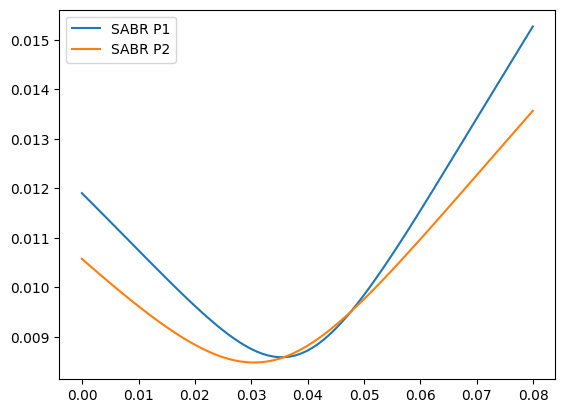

: 

In [ ]:
plt.plot(strikes, sabr_dist_p1.normal_vol(strikes), label='SABR P1')
# plt.plot(strikes, sabr_dist_p1_p2.normal_vol(strikes), label='SABR P1 to P2')
plt.plot(strikes, sabr_dist_p2.normal_vol(strikes), label='SABR P2')
plt.legend()
strike = .005
sabr_p1.normal_vol(strike), sabr_p2.normal_vol(strike), sabr_p1_p2.normal_vol(strike)


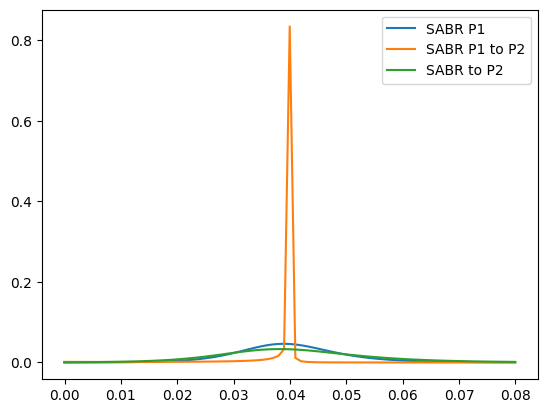

In [11]:
pdf_p1 = sabr_dist_p1.pdf(strikes) / sabr_dist_p1.pdf(strikes).sum()
pdf_p1_p2 = sabr_dist_p1_p2.pdf(strikes) / sabr_dist_p1_p2.pdf(strikes).sum()
pdf_p2 = sabr_dist_p2.pdf(strikes) / sabr_dist_p2.pdf(strikes).sum()

plt.plot(strikes, pdf_p1, label='SABR P1')
plt.plot(strikes, pdf_p1_p2, label='SABR P1 to P2')
plt.plot(strikes, pdf_p2, label='SABR to P2')
plt.legend()

In [29]:
n_samples = 5_000
sampled_p1 = sabr_dist_p1.rvs(size=n_samples) 
sampled_vols_p1_p2 = sabr_dist_p1_p2.normal_vol(sampled_p1)
sampled_p1_p2 = np.random.randn(n_samples, sampled_vols_p1_p2.shape[0]) * sampled_vols_p1_p2 * np.sqrt(sabr_p1_p2.t)
total = (sampled_p1 + sampled_p1_p2).flatten()

ValueError: The function value at x=-10.0 is NaN; solver cannot continue.

In [30]:
# sns.histplot(total[:50_000], kde=True, stat='probability', bins=100, label='Total')
# plt.xlim(strikes[0], strikes[-1])
# plt.plot(strikes, pdf_p2 * 2, label='SABR P2', color='orange')

In [133]:
np.any(np.isnan(total)), (total<-.02).mean(), pdf_p2[strikes<-0.02].sum()

(False, 0.0615156, 0.0541181677436913)

In [140]:
sabr_dist_p1_p2.normal_vol(strikes)

array([0.02425686, 0.02409269, 0.02392853, 0.02376437, 0.0236002 ,
       0.02343604, 0.02327188, 0.02310771, 0.02294355, 0.02277939,
       0.02261522, 0.02245106, 0.0222869 , 0.02212274, 0.02195857,
       0.02179441, 0.02163025, 0.02146608, 0.02130192, 0.02113776,
       0.02097359, 0.02080943, 0.02064527, 0.0204811 , 0.02031694,
       0.02015278, 0.01998861, 0.01982445, 0.01966029, 0.01949612,
       0.01933196, 0.0191678 , 0.01900363, 0.01883947, 0.01867531,
       0.01851114, 0.01834698, 0.01818282, 0.01801865, 0.01785449,
       0.01769033, 0.01752617, 0.017362  , 0.01719784, 0.01703368,
       0.01686951, 0.01670535, 0.01654119, 0.01637702, 0.01621286,
       0.0160487 , 0.01588453, 0.01572037, 0.01555621, 0.01539204,
       0.01522788, 0.01506372, 0.01489955, 0.01473539, 0.01457123,
       0.01440706, 0.0142429 , 0.01407874, 0.01391457, 0.01375041,
       0.01358625, 0.01342209, 0.01325792, 0.01309376, 0.0129296 ,
       0.01276543, 0.01260127, 0.01243711, 0.01227294, 0.01210

In [153]:
space = np.linspace(
    start=-sabr_p1_p2.shift + 0.01, 
    stop=sabr_p1_p2.shift - 0.01, 
    num=1000
    )
vols = sabr_p1_p2.normal_vol(space)
interp_vol = interp1d(space, vols, fill_value='extrapolate')
space

array([-7.81078455e-05, -7.79514734e-05, -7.77951014e-05, -7.76387293e-05,
       -7.74823572e-05, -7.73259852e-05, -7.71696131e-05, -7.70132411e-05,
       -7.68568690e-05, -7.67004969e-05, -7.65441249e-05, -7.63877528e-05,
       -7.62313807e-05, -7.60750087e-05, -7.59186366e-05, -7.57622645e-05,
       -7.56058925e-05, -7.54495204e-05, -7.52931484e-05, -7.51367763e-05,
       -7.49804042e-05, -7.48240322e-05, -7.46676601e-05, -7.45112880e-05,
       -7.43549160e-05, -7.41985439e-05, -7.40421719e-05, -7.38857998e-05,
       -7.37294277e-05, -7.35730557e-05, -7.34166836e-05, -7.32603115e-05,
       -7.31039395e-05, -7.29475674e-05, -7.27911953e-05, -7.26348233e-05,
       -7.24784512e-05, -7.23220792e-05, -7.21657071e-05, -7.20093350e-05,
       -7.18529630e-05, -7.16965909e-05, -7.15402188e-05, -7.13838468e-05,
       -7.12274747e-05, -7.10711027e-05, -7.09147306e-05, -7.07583585e-05,
       -7.06019865e-05, -7.04456144e-05, -7.02892423e-05, -7.01328703e-05,
       -6.99764982e-05, -

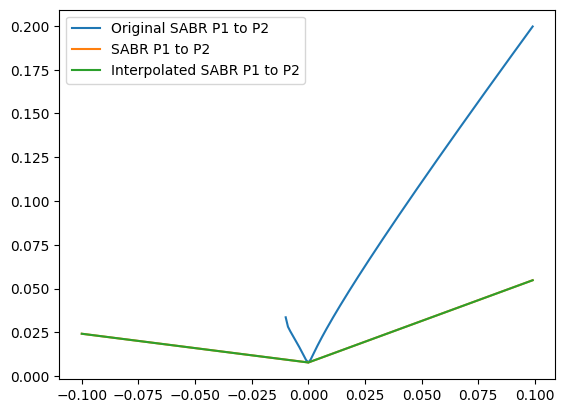

In [152]:
plt.plot(strikes, sabr_p1_p2.normal_vol(strikes), label = 'Original SABR P1 to P2')
plt.plot(strikes, sabr_dist_p1_p2.normal_vol(strikes), label='SABR P1 to P2')
plt.plot(strikes, interp_vol(strikes), label='Interpolated SABR P1 to P2')
plt.legend()

In [ ]:
space = np.linspace(
    start=-sabr_p1_p2.shift + 0.01, 
    stop=sabr_p1_p2.shift - 0.01, 
    num=1000
    )
vols = sabr_p1_p2.normal_vol(space)
interp_vol = interp1d(space, vols, fill_value='extrapolate')


In [148]:
sabr_p1_p2.shift


0.010078107845492276

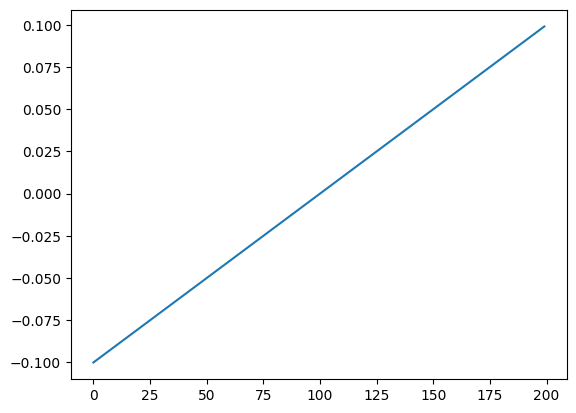

In [145]:
plt.plot(strikes)

In [ ]:
vols_p1_p2 = sabr_dist_p1_p2.normal_vol(strikes)
pdf = ss.norm.pdf(
    x=strikes.reshape(-1, 1), 
    loc = strikes.reshape(1, -1), 
    scale = vols_p1_p2.reshape(1, -1) * np.sqrt(sabr_p1_p2.t)
    )
pdf_df = pd.DataFrame(
    data=pdf, 
    columns=pd.Index(strikes, name='Rate At Start'), 
    index=pd.Index(strikes, name='Rate At End')
    )
pdf_df = pdf_df / pdf_df.sum()
pdf_total = (pdf_df * pdf_p1).sum(axis=1)

In [138]:
kl = np.sum(rel_entr(pdf_total, pdf_p2)) * 10**6
kl

780.1864162349497

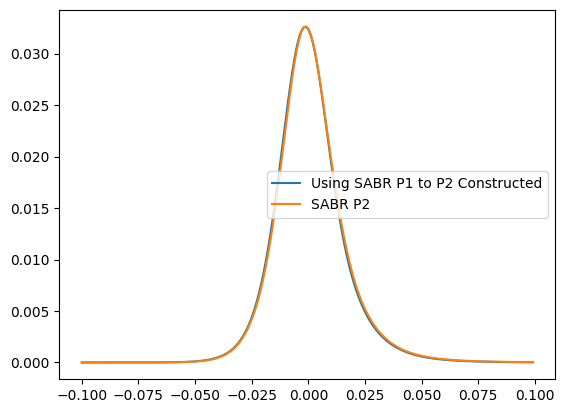

In [139]:
plt.plot(strikes, pdf_total, label = 'Using SABR P1 to P2 Constructed')
plt.plot(strikes, pdf_p2, label='SABR P2')
plt.legend()

In [116]:
vols_p1_p2 = sabr_p1.normal_vol(strikes) #We Use P1 because we asssume carrying the P1 to P2
pdf = ss.norm.pdf(
    strikes.reshape(-1, 1), 
    loc = strikes.reshape(1, -1), 
    scale = vols_p1_p2.reshape(1, -1) * np.sqrt(sabr_p1_p2.t)
    )
pdf_df = pd.DataFrame(pdf, columns=pd.Index(strikes, name='Rate At Start'), index=pd.Index(strikes, name='Rate At End'))
pdf_df = pdf_df / pdf_df.sum()
pdf_total = (pdf_df * pdf_p1).sum(axis=1)

In [117]:
# sabr_dist_p1.normal_vol(strikes)

In [118]:
kl = np.sum(rel_entr(pdf_total, pdf_p2)) * 10**6
kl

5475.599283092276

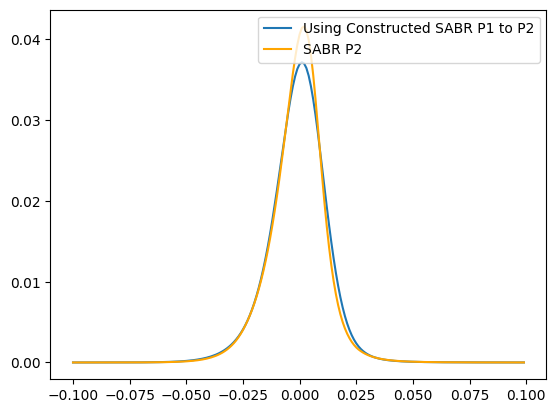

In [119]:
plt.plot(strikes, pdf_total, label = 'Using Constructed SABR P1 to P2')
plt.plot(strikes, pdf_p2,  color='orange', label='SABR P2')
plt.legend()